In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [102]:
#if using local
Data = pd.read_csv('Forecasting_dataset.csv')
Data.head(5)

,id,order_id,placed_at,placed_at_time,merchant_id,sku_id,top_cat_id,top_cat_name,sub_cat_id,qty,price
0,1,2,2021-04-09,16:19,46,101,3.0,food materials,94.0,400,134000.0
1,2,2,2021-04-09,16:19,46,100,3.0,food materials,94.0,400,137000.0
2,3,2,2021-04-09,16:19,46,102,3.0,food materials,94.0,400,169000.0
3,4,2,2021-04-09,16:19,46,99,3.0,food materials,94.0,400,129000.0
4,5,2,2021-04-09,16:19,46,68,3.0,food materials,70.0,360,148500.0


In [189]:
# Extract month and year datetime value
Data['placed_at']= pd.to_datetime(Data['placed_at'])
Data["Order_Month"] = pd.DatetimeIndex(Data['placed_at']).month
Data["Order_Year"] = pd.DatetimeIndex(Data['placed_at']).year

Data['month_year'] = pd.to_datetime(Data['placed_at']).dt.to_period('M')
Data['month_year'] = Data['month_year'].astype(str)
Data['month_year'] = pd.to_datetime(Data['month_year'])

Data["Total Price per order"] = Data["qty"] * Data["price"]
Data.head(3)

,id,order_id,placed_at,placed_at_time,merchant_id,sku_id,top_cat_id,top_cat_name,sub_cat_id,qty,price,month_year,Total Price per order,Order_Month,Order_Year
0,1,2,2021-04-09,16:19,46,101,3.0,food materials,94.0,400,134000.0,2021-04-01,53600000.0,4,2021
1,2,2,2021-04-09,16:19,46,100,3.0,food materials,94.0,400,137000.0,2021-04-01,54800000.0,4,2021
2,3,2,2021-04-09,16:19,46,102,3.0,food materials,94.0,400,169000.0,2021-04-01,67600000.0,4,2021


In [67]:
#check Missing Values
Data.isnull().sum()

id                        0
order_id                  0
placed_at                 0
placed_at_time            0
merchant_id               0
sku_id                    0
top_cat_id               11
top_cat_name             11
sub_cat_id               11
qty                       0
price                     0
month_year                0
Total Price per order     0
dtype: int64

the number of rows with missing value is 11 out of 336472, after Phase 1 EDA we will remove these rows at such small proportion

In [68]:
#Drop All Rows with any Null/NaN/NaT Values
#Data.dropna(0, inplace = True)
#summary statistics
Data.describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,Total Price per order
count,336472.000000,336472.000000,336472.000000,336472.000000,336461.000000,336461.000000,3.364720e+05,3.364720e+05,3.364720e+05
mean,168236.500000,29079.405656,798.592706,525.308685,10.319098,45.395065,3.789684e+01,1.378956e+05,5.346555e+05
std,97131.244225,18909.738357,550.271799,304.262943,7.906257,27.767388,1.035873e+04,1.744689e+05,2.859301e+06
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,4.375000e-02,5.000000e+00
25%,84118.750000,11485.000000,352.000000,322.000000,4.000000,27.000000,1.000000e+00,4.600000e+04,1.165000e+05
50%,168236.500000,28436.000000,664.000000,438.000000,8.000000,43.000000,2.000000e+00,1.070000e+05,2.080000e+05
75%,252354.250000,46193.250000,1217.000000,589.000000,14.000000,69.000000,5.000000e+00,1.845000e+05,4.350000e+05
max,336472.000000,62048.000000,2138.000000,1617.000000,33.000000,96.000000,4.800000e+06,5.875000e+07,3.831222e+08


In [69]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336472 entries, 0 to 336471
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     336472 non-null  int64         
 1   order_id               336472 non-null  int64         
 2   placed_at              336472 non-null  datetime64[ns]
 3   placed_at_time         336472 non-null  object        
 4   merchant_id            336472 non-null  int64         
 5   sku_id                 336472 non-null  int64         
 6   top_cat_id             336461 non-null  float64       
 7   top_cat_name           336461 non-null  object        
 8   sub_cat_id             336461 non-null  float64       
 9   qty                    336472 non-null  int64         
 10  price                  336472 non-null  float64       
 11  month_year             336472 non-null  datetime64[ns]
 12  Total Price per order  336472 non-null  floa

## Part I. EDA

---
**Q1. Is there any evident pattern of trend and seasonality over the sales data? Identify the pattern among each SKU, SKU category, and all aggregated store sales.**

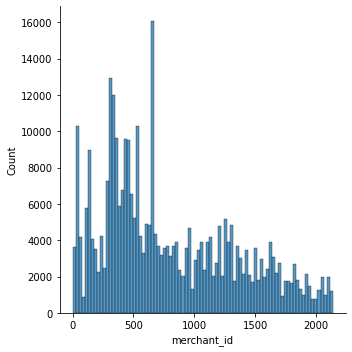

In [72]:
#plot the histogram to see the distribution of the point data.
sns.displot(Data, x="merchant_id")

Even though demand for few items is high in months 3 and 4 i.e. march and april, total prices for the items ordered is high in october, november and december months.

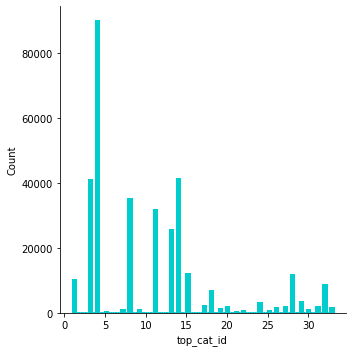

In [43]:
sns.displot(Data, x="top_cat_id", edgecolor="#00CDCD", color="#00CDCD", linewidth= 3)

Here we can see that the categories such 3,4,14 has higher demands overall. Now lets see are there any categories which does not have any demand in any specific period.

In [73]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') 

sns.scatterplot(data=Data, x="month_year", y="top_cat_id")

axes.xaxis.set\_major\_locator(months)
axes.xaxis.set\_major\_formatter(years_fmt)
axes.xaxis.set\_minor\_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

sns.scatterplot(data=Data, x="placed_at", y="top_cat_id")

SyntaxError: unexpected character after line continuation character (<ipython-input-73-6360ad938581>, line 8)

__SKU Categories__

In [110]:
def top_last(column, feature):    
    df = Data
    top5 = df.groupby(by=column).sum().sort_values(by=['qty'],ascending=False).head(n=5)
    last5 = df.groupby(by=column).sum().sort_values(by=['qty'],ascending=True).head(n=5)
    top_ids = top5.index.values.tolist()
    last_ids = last5.index.values.tolist()
    print("Top 5 {} with highest sales amount:{}".format(feature, top_ids))
    print("Top 5 {} with lowest sales amount:{}".format(feature, last_ids))

    top_df = df.loc[df[column].isin(top_ids)].groupby(by=['month_year',column]).sum()
    last_df = df.loc[df[column].isin(last_ids)].groupby(by=['month_year',column]).sum()

    top_df[['qty']].unstack().plot(figsize=(10, 5))
    last_df[['qty']].unstack().plot(figsize=(10, 5))

Top 5 categories with highest sales amount:['sachet drink', 'laundry soap', 'ingredients', 'snack', 'food materials']
Top 5 categories with lowest sales amount:['protein food', 'breakfast food', 'external medicine', 'carpentry tools', 'gas ligher']


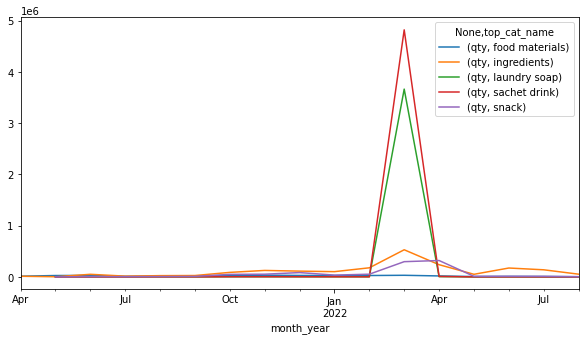

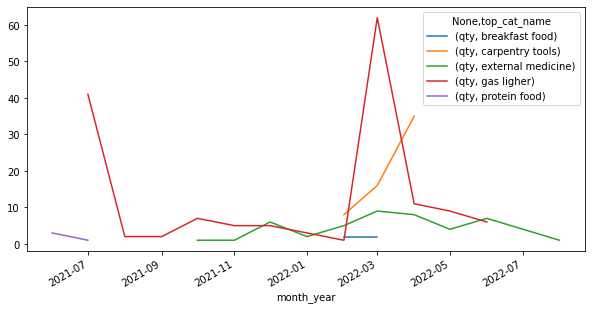

In [111]:
top_last(column = 'top_cat_name', feature = 'categories')

Top 5 sale category ['sachet drink', 'laundry soap', 'ingredients', 'snack', 'food materials']\
For top sale category, top 3 sale category have a sale quantity peak on March 2022.\
We'll look into March 2021 data in Question 4 to verify if this pattern appears on 2021 March

Bottom 5 sale cateogy ['protein food', 'breakfast food', 'external medicine', 'carpentry tools', 'gas ligher'] \
There is no pattern of sale peak on March 2022 like top 5 categories 

__SKU ID__

Top 5 SKU ID with highest sales amount:[277, 238, 390, 1300, 1179]
Top 5 SKU ID with lowest sales amount:[1227, 870, 669, 526, 1091]


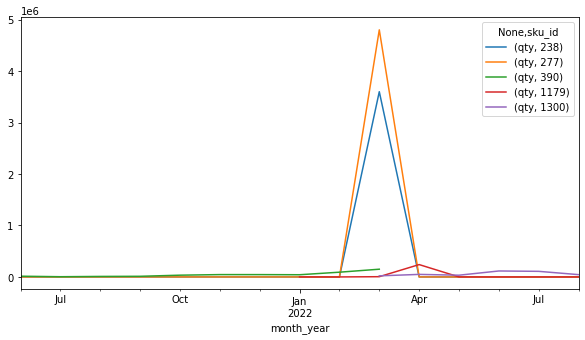

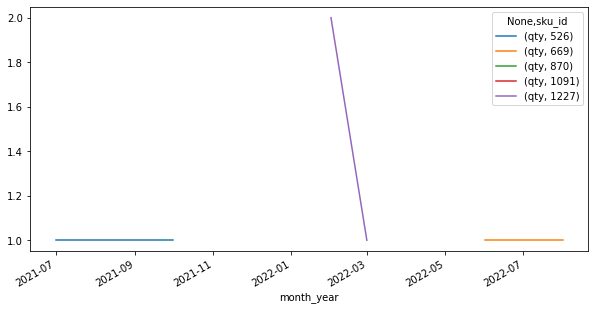

In [112]:
top_last(column = 'sku_id', feature = 'SKU ID')

__Merchants__

Top 5 merchants with highest sales amount:[2045, 1466, 2048, 1057, 1996]
Top 5 merchants with lowest sales amount:[1802, 1723, 992, 2099, 1978]


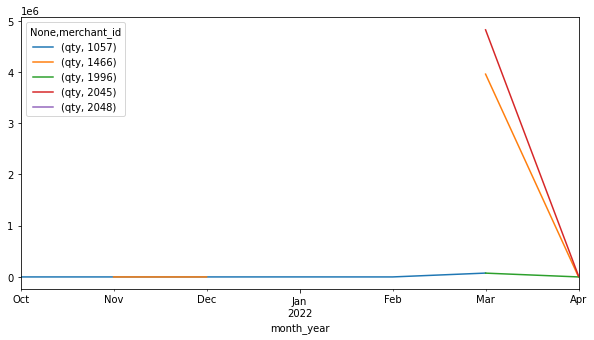

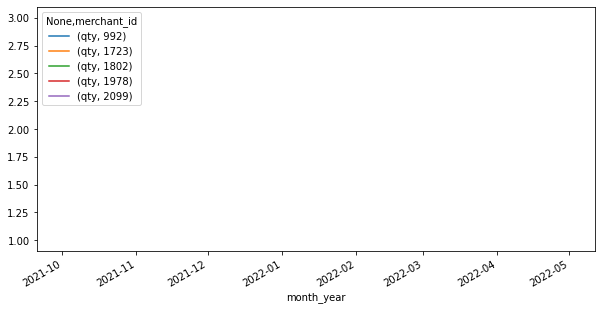

In [113]:
top_last(column = 'merchant_id', feature = 'merchants')

There is a sale peak on March 2022. Take top 1 sale category sachet drink as an example,\
we find the sale quantity all come from sku id 277 item. \
Furthermore, it is interesting that all are saled by merchant 2045. 

---
**Q2. Is there any interesting observation regarding any period with outlying SKU, SKU category, or store
sales?**

In [ ]:
from datetime import datetime

def sku_bar(sku):   
    data = Data.query("sku_id == @sku") 
    fig = plt.figure(figsize = (6, 3))

    # creating the bar plot
    plt.bar(data['placed_at'].dt.day_name(), data['qty'], color ='chocolate', width = 0.3)

    plt.xlabel("Days of the week")
    plt.ylabel("No. of SKU 390 purchased")
    plt.title("SKU ID {} sales".format(sku))
    plt.show()

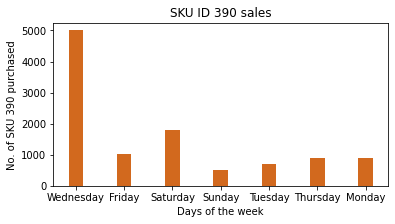

In [519]:
sku_bar(sku=390)

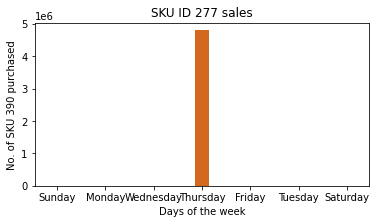

In [520]:
sku_bar(sku=277)

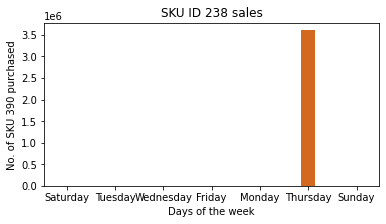

In [521]:
sku_bar(sku=238)

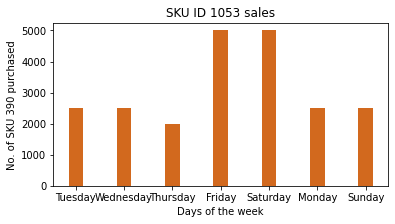

In [522]:
sku_bar(sku=1053)

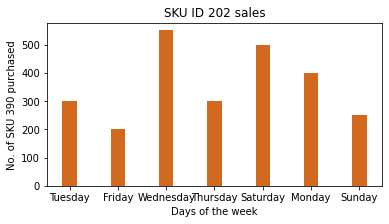

In [523]:
sku_bar(sku=202)

__Ingredients__

In [177]:
def sku_line(top_cat_name, col):
    df= Data.query("top_cat_name == @top_cat_name")
    grouped = df.groupby(['month_year']).agg({'qty': ['sum', 'mean', 'count']})
    grouped.columns = ['Total quantity','Average quantity', 'Count']
    D_qty = grouped.reset_index()
    
    D_qty = group()
    
    plt.plot_date(D_qty['month_year'], D_qty[col],linestyle ='solid',  color='chocolate')
    plt.tight_layout()

    plt.xlabel("Period")
    plt.ylabel(col)
    plt.title("{} of orders - {}".format(col, top_cat_name))
    plt.show()   

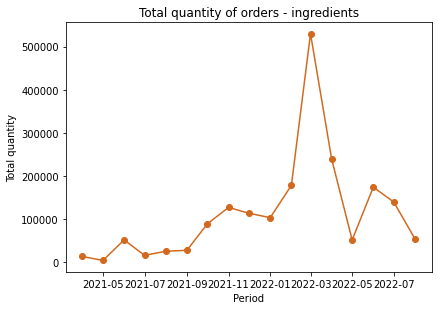

In [178]:
sku_line(top_cat_name = 'ingredients', col='Total quantity')

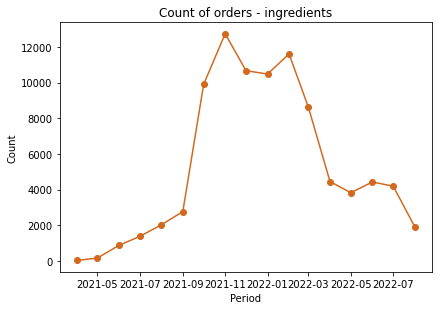

In [179]:
sku_line(top_cat_name = 'ingredients', col='Count')

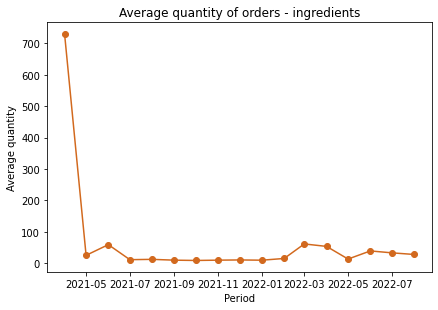

In [180]:
sku_line(top_cat_name = 'ingredients', col='Average quantity')

---
**Q3. How does the demand distribution for each SKU and SKU category look like? Can they be represented
by any defined form of distribution?**

__sku category__

ingredients                90006
packaged drink             41299
food materials             40904
instant food               35036
snack                      31880
powder drink               25522
sachet drink               12129
laundry soap               11613
bottled water              10019
sweetend condensed milk     8595
Name: top_cat_name, dtype: int64


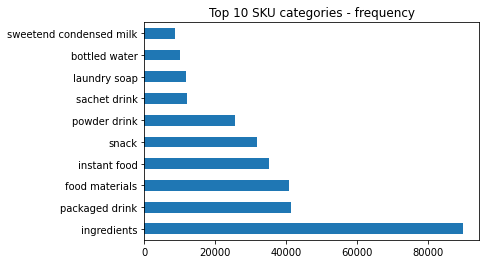

In [147]:
# SKU categories sold most times
top_cat_list1 = Data['top_cat_name'].value_counts().sort_values(ascending=False).head(10)
print(top_cat_list1)

top_cat_list1.plot(kind='barh', title='Top 10 SKU categories - frequency')
plt.show()

top_cat_name             top_cat_id
sachet drink             15.0          4854490
laundry soap             28.0          3692437
ingredients              4.0           1935094
snack                    11.0           968877
food materials           3.0            344900
packaged drink           14.0           298221
instant food             8.0            264083
powder drink             13.0           141780
bottled water            1.0             97060
hair care                20.0            26207
baby care                18.0            23995
sweetend condensed milk  32.0            22619
general medicine         17.0            19753
syrup                    31.0             9368
dish soap                29.0             9150
Name: qty, dtype: int64


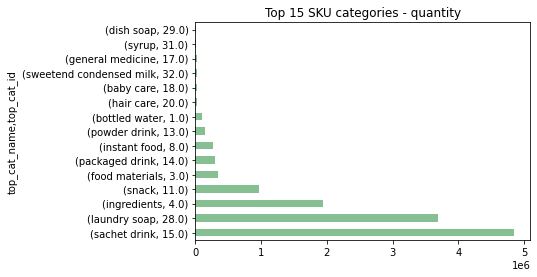

In [145]:
# SKU categories sold most items
top_cat_list=Data.groupby(["top_cat_name","top_cat_id"])["qty"].agg('sum').sort_values(ascending=False).head(15)
print(top_cat_list)

top_cat_list.plot(kind='barh',color='#86bf91', title='Top 15 SKU categories - quantity')
plt.show()

Total sales amount of sku categories at different levels

Text(0.5, 1.0, 'Categories with total sale quantity>400000')

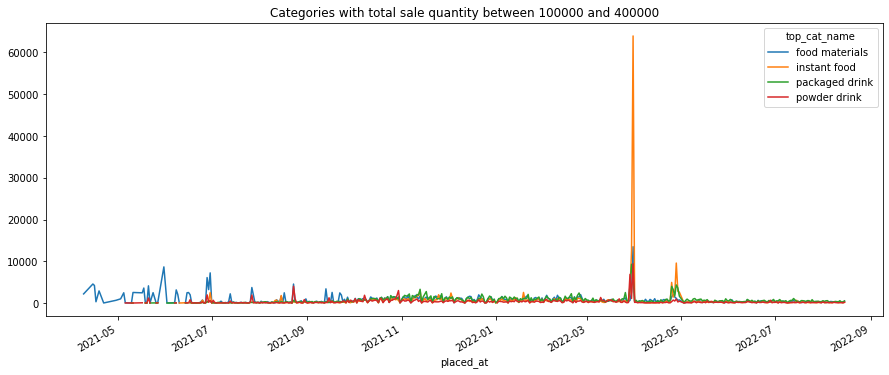

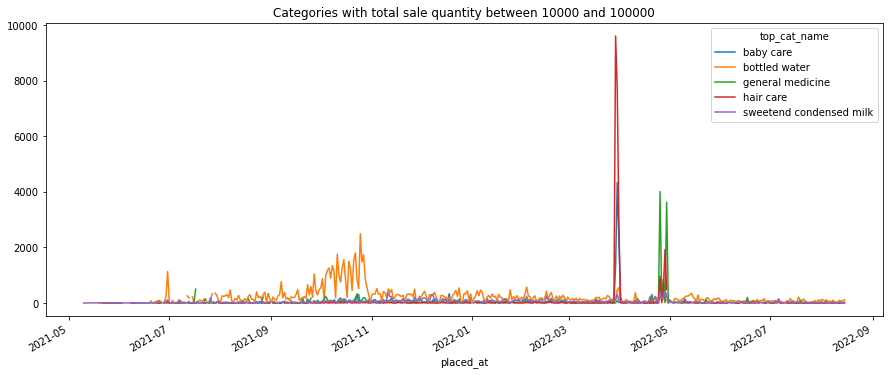

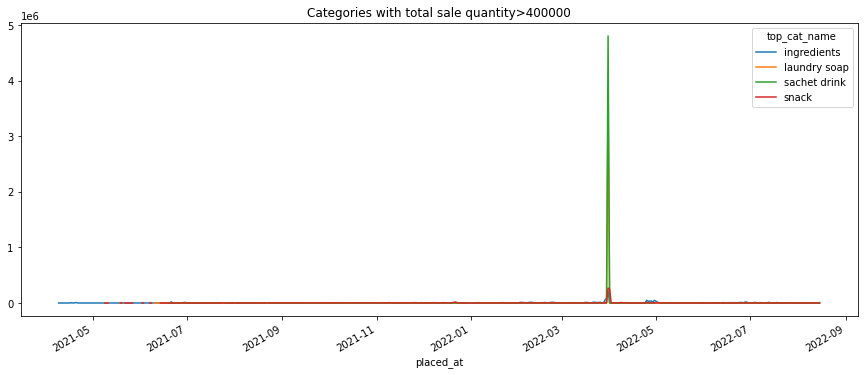

In [125]:
rm_list = Data.groupby(["top_cat_id"])["qty"].agg('sum').sort_values(ascending=False)
# sales amount [100000, 400000)
Data[Data['top_cat_id'].isin(rm_list.iloc[4:8].index)].groupby(['placed_at','top_cat_name'])['qty'].agg(sum).unstack().plot(figsize=(15,6))
plt.title('Categories with total sale quantity between 100000 and 400000', fontsize = 12)

# sales amount [10000, 100000)
Data[Data['top_cat_id'].isin(rm_list.iloc[8:13].index)].groupby(['placed_at','top_cat_name'])['qty'].agg(sum).unstack().plot(figsize=(15,6))
plt.title('Categories with total sale quantity between 10000 and 100000', fontsize = 12)

# sales amount >400000
top4cat= Data[Data['top_cat_id'].isin(rm_list.iloc[0:4].index)].groupby(['placed_at','top_cat_name'])['qty'].agg(sum).unstack().plot(figsize=(15,6))
plt.title('Categories with total sale quantity>400000', fontsize = 12)

sku

327    7500
522    6919
390    6409
438    5589
523    4804
263    4548
185    4463
521    4462
276    3718
184    3480
Name: sku_id, dtype: int64


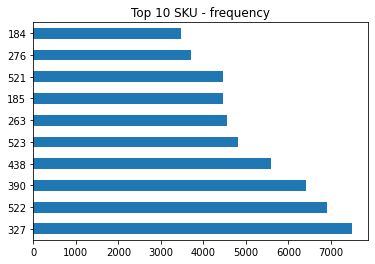

In [195]:
# SKU sold most times
sku_list1 = Data['sku_id'].value_counts().sort_values(ascending=False).head(10)
print(sku_list1)

import matplotlib.pyplot as plt

sku_list1.plot(kind='barh', title='Top 10 SKU - frequency')
plt.show()

sku_id
277     4803103
238     3602844
390      451559
1300     374089
1179     244959
427      169642
200      135763
1053     107961
1503      84708
202       67093
Name: qty, dtype: int64


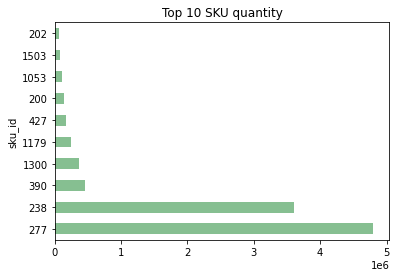

In [194]:
# SKU sold most items
sku_list=Data.groupby(["sku_id"])["qty"].agg('sum').sort_values(ascending=False).head(10)
print(sku_list)

sku_list.plot(kind='barh',color='#86bf91', title='Top 10 SKU quantity')
plt.show()

---
**Q4. How is the timing and quantity variation of the demands?**

__Timing variation__\
Followup Q2, March 15 to May 15, top SKU categories with total sales amount>400k

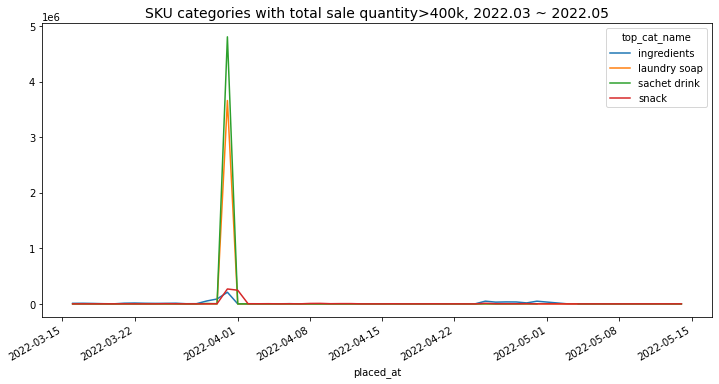

In [131]:
df = top4cat.reset_index()

# Sales between March 15 to May 15
df= df.loc[(df['placed_at']>'2022-3-15') & (df['placed_at']<'2022-5-15')]
df.pivot(index='placed_at', columns='top_cat_name', values='qty').plot(figsize=(12, 6))
plt.title('SKU categories with total sale quantity>400k, 2022.03 ~ 2022.05', fontsize = 14)
plt.show()

we look at categories that sales amount > 100000, means top 8 categories


Text(0.5, 1.0, 'SKU categories(total sold items>100000), weekly base')

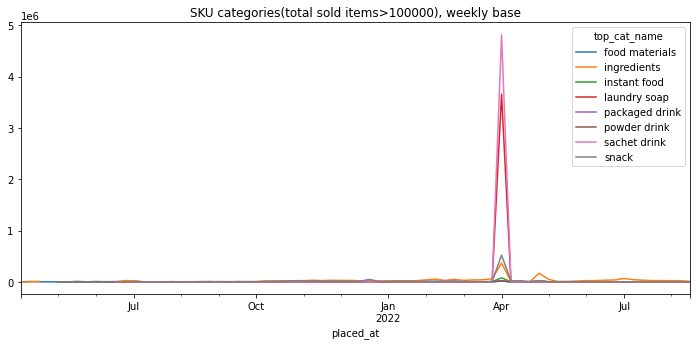

In [137]:
qty8_list = Data.groupby(["top_cat_id"])["qty"].agg('sum').sort_values(ascending=False).head(8).index.values.tolist()
qty8_df = Data.loc[Data['top_cat_id'].isin(qty8_list)]

#qty8_df['placed_at'] = pd.to_datetime(qty8_df['placed_at']) - pd.to_timedelta(7, unit='d')
qty8_df = qty8_df.groupby([pd.Grouper(key='placed_at', freq='W-Fri'),'top_cat_name'])['qty'].agg(sum)

qty8_df.unstack().plot(figsize=(12, 5))
plt.title('SKU categories(total sold items>100000), weekly base', fontsize = 12)

__quantity variation__\

In [478]:
#sku id sold more than 500 items in each transaction
sku500_list = Data[Data['qty']> 500].sku_id.unique()
sku500_df = Data.loc[Data['sku_id'].isin(sku500_list)]

print(sku500_list.shape[0])
sku500_df['top_cat_name'].value_counts().head(10)

155


ingredients       35433
food materials    26474
powder drink      14384
packaged drink    11580
instant food       8717
snack              6412
laundry soap       3767
sachet drink       2958
bottled water       800
hair care           757
Name: top_cat_name, dtype: int64

155 sku id have been sold more than 500 items in every single transaction, define as high demand

*Weekly interval*

In [479]:
#sale quantaties of these SKU ID in weekly intervals
sku500_df['week'] = pd.to_datetime(sku500_df['placed_at']) - pd.to_timedelta(7, unit='d')
sku500_df = sku500_df.groupby([pd.Grouper(key='week', freq='W-Fri'),'sku_id'])['qty'].agg(sum).to_frame().reset_index()

sku500_df.head(2)

C:\Users\Em\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,week,sku_id,qty
0,2021-04-02,68,360
1,2021-04-02,101,400


[277, 238, 390, 1300, 1179, 427, 200, 1053, 1503, 202]


Text(0.5, 1.0, 'Top-sale SKU (sold items>500 each time), weekly base')

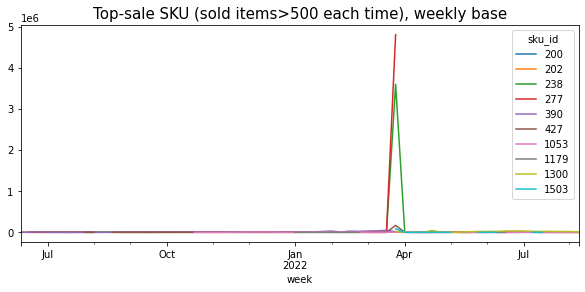

In [481]:
#top 10 sku ID
sku500_top= sku500_df.groupby(["sku_id"])['qty'].sum().sort_values(ascending=False).head(10).index.values.tolist()
print(sku500_top)

sku500_df[sku500_df["sku_id"].isin(sku500_top)].pivot(index='week', columns='sku_id', values='qty').plot(figsize=(10, 4))
plt.title('Top-sale SKU (sold items>500 each time), weekly base', fontsize = 15)

In [482]:
sku500_df = sku500_df.pivot(index='sku_id', columns='week', values='qty')

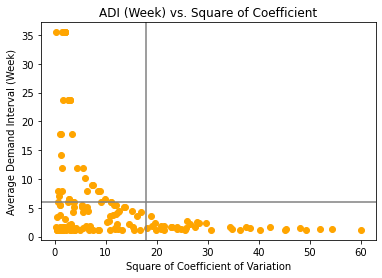

In [484]:
# Average Demand Interval (ADI)
# placed_at was converted to weekly
ADI = len(sku500_df.columns) / sku500_df.count(axis=1)

# Square of the Coefficient of Variation (COV)
cov = lambda x: np.square(np.std(x, ddof=1) / np.mean(x))
CV2 = sku500_df.apply(cov,axis=1)

import matplotlib.pyplot as plt

plt.scatter(CV2, ADI,color='orange') 
plt.title('ADI (Week) vs. Square of Coefficient')
plt.xlabel('Square of Coefficient of Variation')
plt.ylabel('Average Demand Interval (Week)')
plt.axhline(y=6, linewidth=1.5, color='grey')
plt.axvline(x=18, linewidth=1.5, color='grey')
plt.show()

In [155]:
#sku500_df.drop('ADI','CV2', 0, 0, axis=1)
#sku500_df['ADI']=ADI
#sku500_df['CV2']=CV2

*monthly interval*

In [485]:
sku500_df_m = Data.loc[Data['sku_id'].isin(sku500_list)].groupby(by=['month_year','sku_id']).sum()[['qty']].reset_index()
sku500_df_m = sku500_df_m.pivot(index='sku_id', columns='month_year', values='qty')

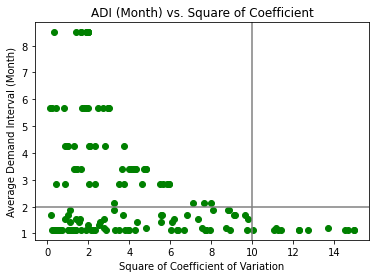

In [487]:
# Average Demand Interval (ADI)
# placed_at was converted to monthly
ADI = len(sku500_df_m.columns) / sku500_df_m.count(axis=1)

# Square of the Coefficient of Variation (COV)
cov = lambda x: np.square(np.std(x, ddof=1) / np.mean(x))
CV2 = sku500_df_m.apply(cov,axis=1)


import matplotlib.pyplot as plt

plt.scatter(CV2, ADI,color='green') 
plt.title('ADI (Month) vs. Square of Coefficient')
plt.xlabel('Square of Coefficient of Variation')
plt.ylabel('Average Demand Interval (Month)')
plt.axhline(y=2, linewidth=1.5, color='grey')
plt.axvline(x=10, linewidth=1.5, color='grey')
plt.show()

---
**Q5. Does demand for one SKU correlate with the demand of another SKUs or SKU category?​**

In [115]:
df = Data.groupby(by=['placed_at','sku_id']).sum()[['qty']]
top_df = Data.groupby(by='sku_id').sum().sort_values(by=['qty'],ascending=False).head(n=10)
top_cat_ids = top_df.index.values.tolist()
top_df = Data.loc[Data['sku_id'].isin(top_cat_ids)]
top_df.head(3)

,id,order_id,placed_at,placed_at_time,merchant_id,sku_id,top_cat_id,top_cat_name,sub_cat_id,qty,price,Order_Month,Order_Year,month_year,Total Price per order
844,861,72,2021-06-15,13:38,137,202,3.0,food materials,9.0,30,13000.0,6,2021,2021-06,390000.0
870,938,77,2021-06-16,15:52,309,390,4.0,ingredients,51.0,325,12600.0,6,2021,2021-06,4095000.0
886,883,81,2021-06-17,8:59,29,200,4.0,ingredients,7.0,20,18250.0,6,2021,2021-06,365000.0


In [118]:
top_df = top_df.groupby(by=['placed_at','sku_id']).sum()[['qty']].reset_index().pivot(index='placed_at', columns='sku_id', values='qty')

#Correlation 
corrMatrix = top_df.corr(method='pearson')
corrMatrix

sku_id,200,202,238,277,390,427,1053,1179,1300,1503
sku_id,,,,,,,,,,
200,1.000000,0.360610,0.076663,0.082359,0.141749,0.098089,0.183003,-0.154982,0.121585,0.515825
202,0.360610,1.000000,-0.030492,-0.050567,0.201558,-0.070791,0.124113,-0.185417,0.303755,-0.014509
238,0.076663,-0.030492,1.000000,1.000000,-0.058572,0.999999,-0.029019,-0.020040,0.119363,0.999996
277,0.082359,-0.050567,1.000000,1.000000,-0.072057,0.999999,-0.044513,0.999694,0.175624,0.999997
390,0.141749,0.201558,-0.058572,-0.072057,1.000000,-0.117851,-0.025233,-0.279839,-0.689453,NaN
427,0.098089,-0.070791,0.999999,0.999999,-0.117851,1.000000,-0.063206,1.000000,0.233290,1.000000
1053,0.183003,0.124113,-0.029019,-0.044513,-0.025233,-0.063206,1.000000,0.561211,-0.179092,-0.056146
1179,-0.154982,-0.185417,-0.020040,0.999694,-0.279839,1.000000,0.561211,1.000000,0.118330,-0.316701
1300,0.121585,0.303755,0.119363,0.175624,-0.689453,0.233290,-0.179092,0.118330,1.000000,0.197680


<AxesSubplot:xlabel='sku_id', ylabel='sku_id'>

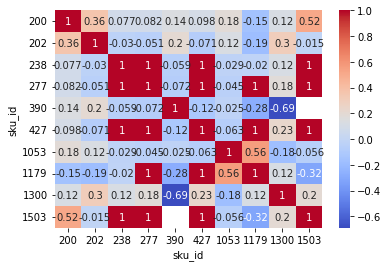

In [119]:
# corrMatrix
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

One sku can be highly correlated with another sku. \
For example, pearson corrleation of sku 238 and sku 277 is 1, means these two sku ids are positively correlated

---
**Q6. What is the characteristic of the price data? Is there any interesting finding which might reflect how price affected the demands?**

In [190]:
def monthly_scatter(df):
    sns.scatterplot(data=df, x=df['Order_Month'], y=df['qty'], size=df['price'], legend=False, sizes = (20,2000))   

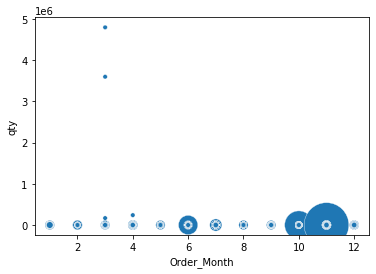

In [191]:
monthly_scatter(df=Data)

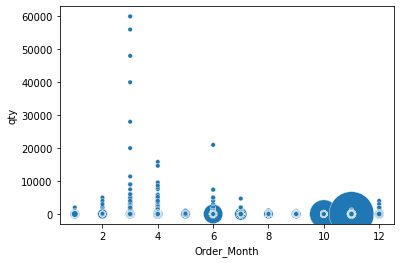

In [192]:
# remove outliers for the quantity
monthly_scatter(df=Data[Data['qty'] < 100000])

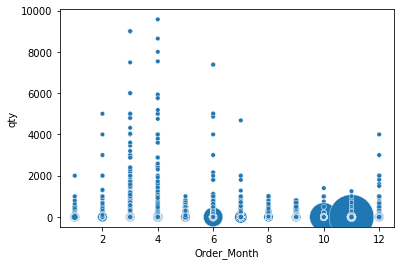

In [193]:
#filtering some more data 
monthly_scatter(df=Data[Data['qty'] < 10000])

In [379]:
top_cat_list=[4,15,28,11,3]
colorlist= ['chocolate','seagreen','maroon','darkkhaki','teal']


def qty_group(grouper, df):
    grouped = df.groupby([grouper]).agg({'qty': ['sum', 'mean', 'count']})
    grouped.columns = ['Total quantity','Average quantity', 'Count']    
    return grouped.reset_index()

def qty_line(col): 
    i=0
    for top_cat_id in top_cat_list:       
        df= Data.query("top_cat_id == @top_cat_id")
        grouper='month_year'
        data = qty_group(grouper, df)        
        plt.plot_date(data[grouper], data[col], linestyle ='solid', color= colorlist[i], label= top_cat_id)
        i+=1;
 
    plt.tight_layout()
    plt.xlabel("Period")
    plt.ylabel(col)
    plt.title("{} of orders".format(col))
    plt.legend()
    plt.show()

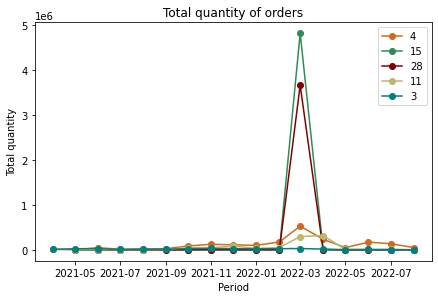

In [380]:
qty_line(col='Total quantity')

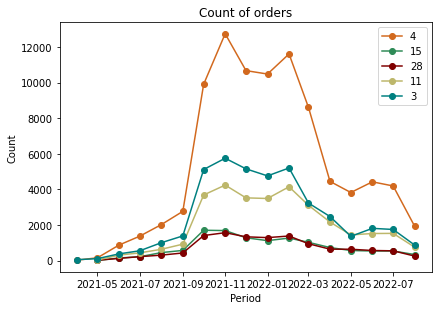

In [382]:
qty_line(col='Count')

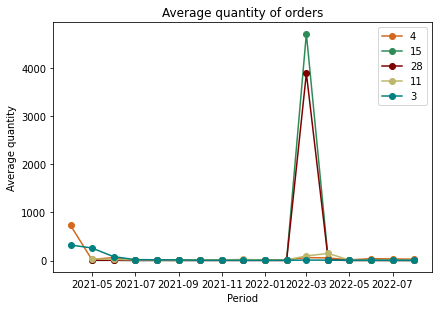

In [383]:
qty_line(col='Average quantity')

In [384]:
top_cat_list=[4,15,28,11,3]
colorlist= ['chocolate','seagreen','maroon','darkkhaki','teal']

def price_group(grouper, df):
    grouped = df.groupby([grouper]).agg({'price': ['sum', 'mean', 'count']})
    grouped.columns = ['Total price','Average price', 'Count']
    return grouped.reset_index()

def price_line(col): 
    i=0
    grouper='month_year'
    for top_cat_id in top_cat_list:       
        df= Data.query("top_cat_id == @top_cat_id")
        data = price_group(grouper, df)
        plt.plot_date(data['month_year'], data[col], linestyle ='solid', color= colorlist[i], label= top_cat_id)
        i+=1;
    
    plt.tight_layout()
    plt.xlabel("Period")
    plt.ylabel(col)
    plt.title("{} of orders".format(col))
    plt.legend()
    plt.show()  

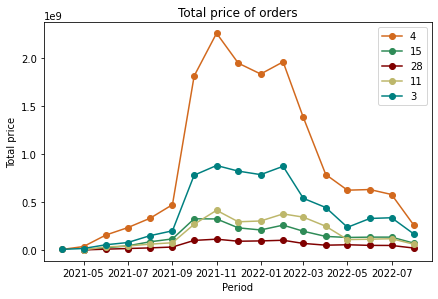

In [385]:
price_line(col='Total price')

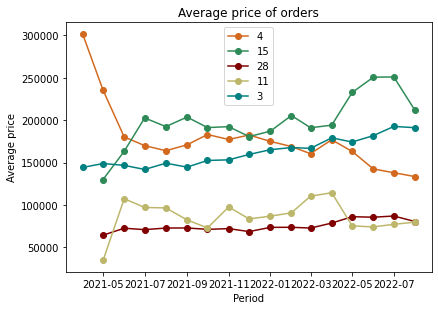

In [309]:
price_line(col='Average price')

In [501]:
df=Data

def price_demand(grouper, sku):

    qty = qty_group(grouper, df)
    price = price_group(grouper, df)

    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax2 = ax1.twinx()

    width=1.0 if grouper=='top_cat_id' else 10.0   
    ax1.bar(qty[grouper], qty['Total quantity'], color='teal', edgecolor="black", alpha=0.4, width=width)
    ax2.plot(price[grouper], price['Average price'], color='chocolate', lw=2.5)

    ax1.set_xlabel(grouper)
    ax1.set_ylabel("Demand", color='teal', fontsize=12)
    ax1.tick_params(axis="y", labelcolor='teal')

    ax2.set_ylabel("Average Price", color='chocolate', fontsize=12)
    ax2.tick_params(axis="y", labelcolor='chocolate')

    if grouper=='month_year':        
        title="Price vs Monthly Demand - SKU {}".format(sku) if sku is not None else "Price vs Monthly Demand"
    else:
        title="Category wise Price vs Demand"
    
    fig.autofmt_xdate()
    fig.suptitle(title, fontsize=15)

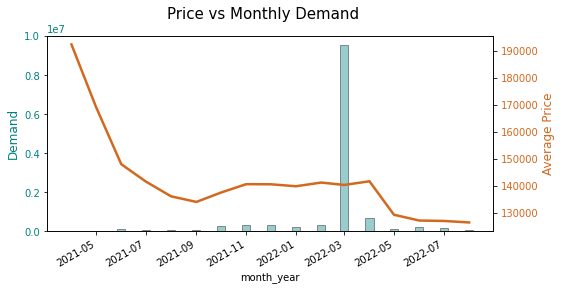

In [502]:
price_demand(grouper='month_year', sku=None)

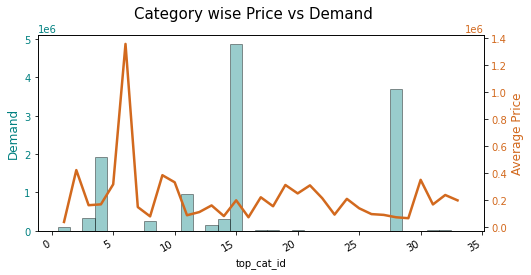

In [503]:
price_demand(grouper='top_cat_id', sku=None)

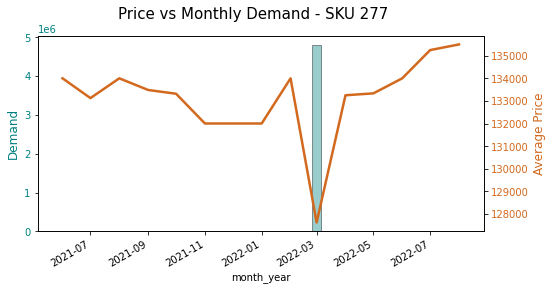

In [504]:
df = Data.query("sku_id == 277") 
price_demand(grouper='month_year', sku=277)

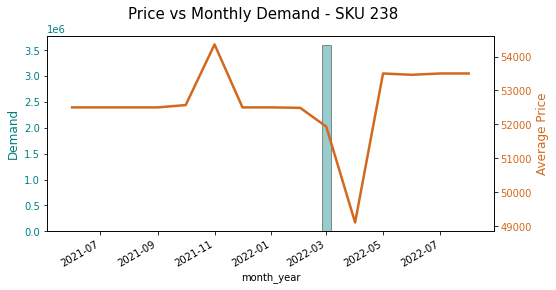

In [505]:
df = Data.query("sku_id == 238") 
price_demand(grouper='month_year', sku=238)

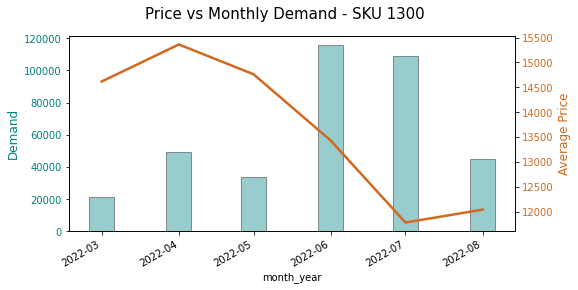

In [506]:
df = Data.query("sku_id == 1300") 
price_demand(grouper='month_year', sku=1300)

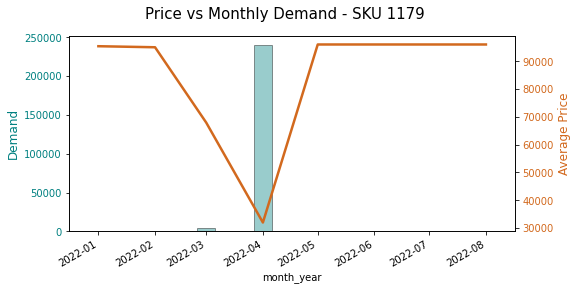

In [507]:
df = Data.query("sku_id ==1179") 
price_demand(grouper='month_year', sku=1179)

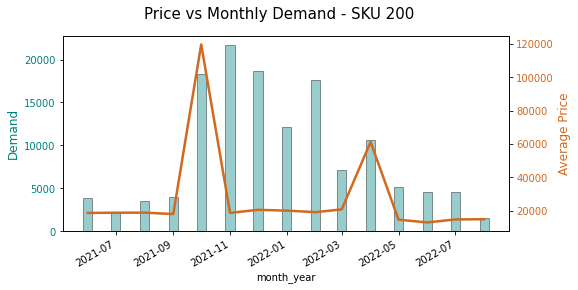

In [508]:
df = Data.query("sku_id ==200") 
price_demand(grouper='month_year', sku=200)

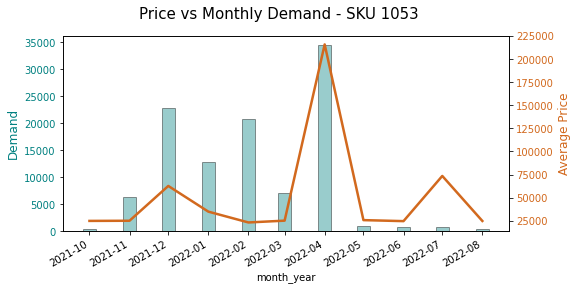

In [509]:
df = Data.query("sku_id ==1053") 
price_demand(grouper='month_year', sku=1053)

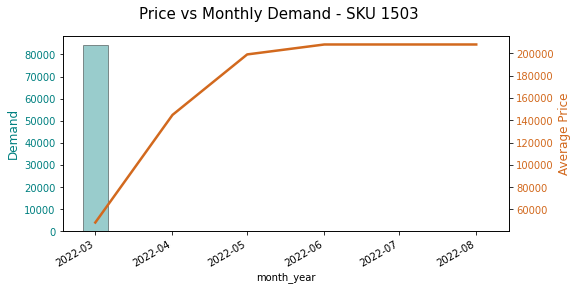

In [510]:
df = Data.query("sku_id ==1503") 
price_demand(grouper='month_year', sku=1503)

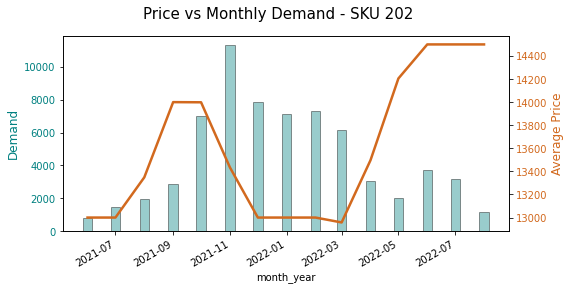

In [511]:
df = Data.query("sku_id ==202") 
price_demand(grouper='month_year', sku=202)

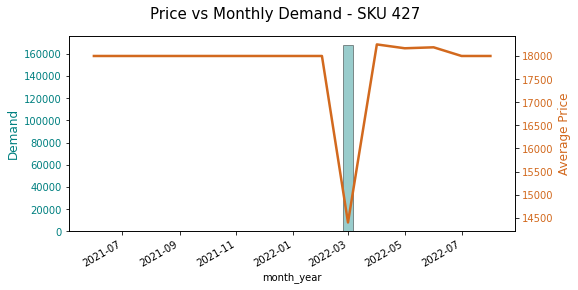

In [512]:
df = Data.query("sku_id ==427") 
price_demand(grouper='month_year', sku=427)